# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [126]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots


# Importing data

In [127]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames)

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [128]:
# Print dataset
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [129]:
# Print dataset shape
dataset.shape

(150, 5)

In [130]:
# Print column names
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [131]:
# Drop na
dataset.isna().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Flower          0
dtype: int64

3. Encoding the class label categorical column: from string to num


In [132]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}, inplace=True)

#Visualize the dataset
dataset

/tmp/ipykernel_125522/553673807.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}, inplace=True)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


5. Scatter plot of the data

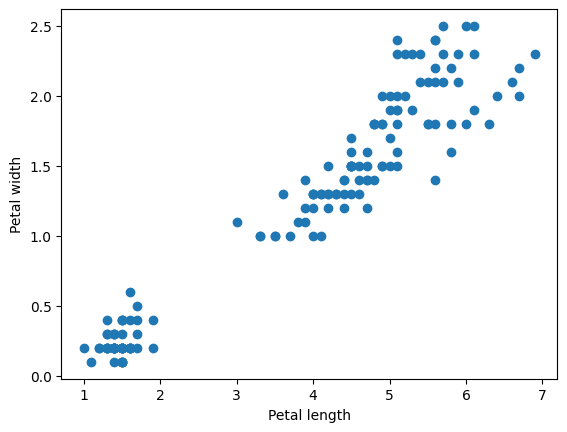

In [133]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length, dataset.Petal_Width)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

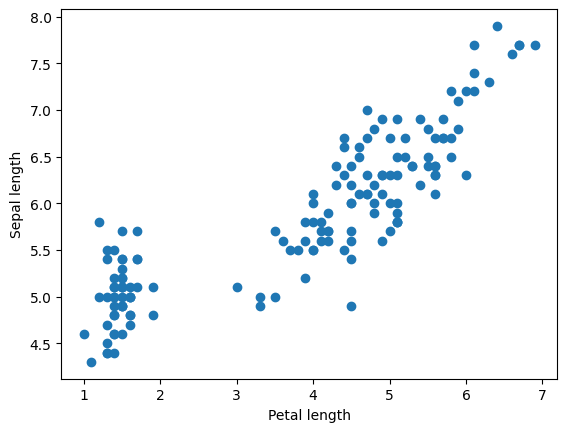

In [134]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length, dataset.Sepal_Length)
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

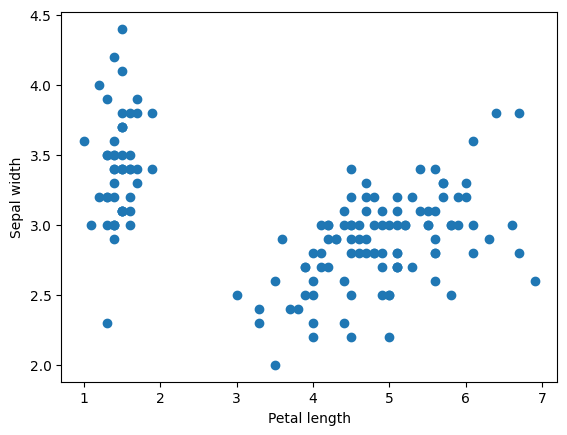

In [135]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length, dataset.Sepal_Width)
plt.xlabel("Petal length")
plt.ylabel("Sepal width")
plt.show()

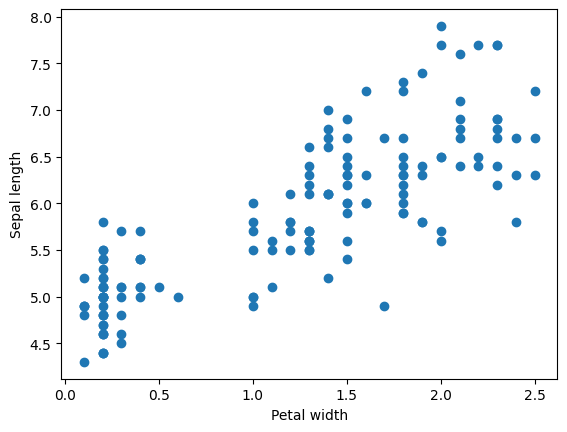

In [136]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width, dataset.Sepal_Length)
plt.xlabel("Petal width")
plt.ylabel("Sepal length")
plt.show()

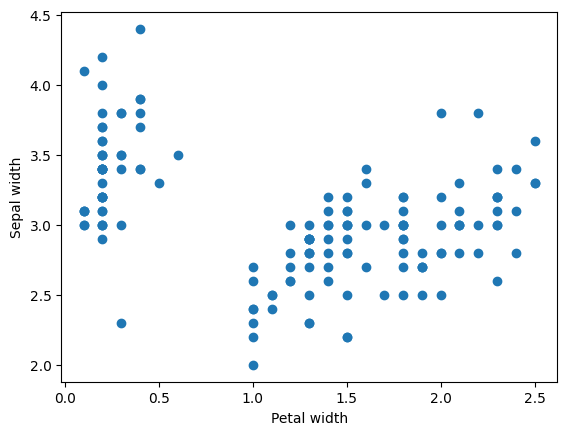

In [137]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width, dataset.Sepal_Width)
plt.xlabel("Petal width")
plt.ylabel("Sepal width")
plt.show()

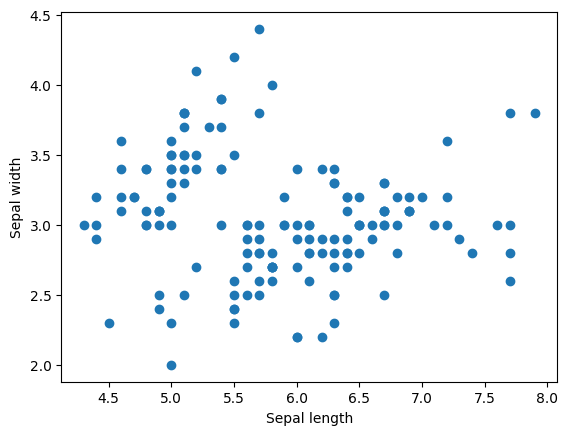

In [138]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length, dataset.Sepal_Width)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

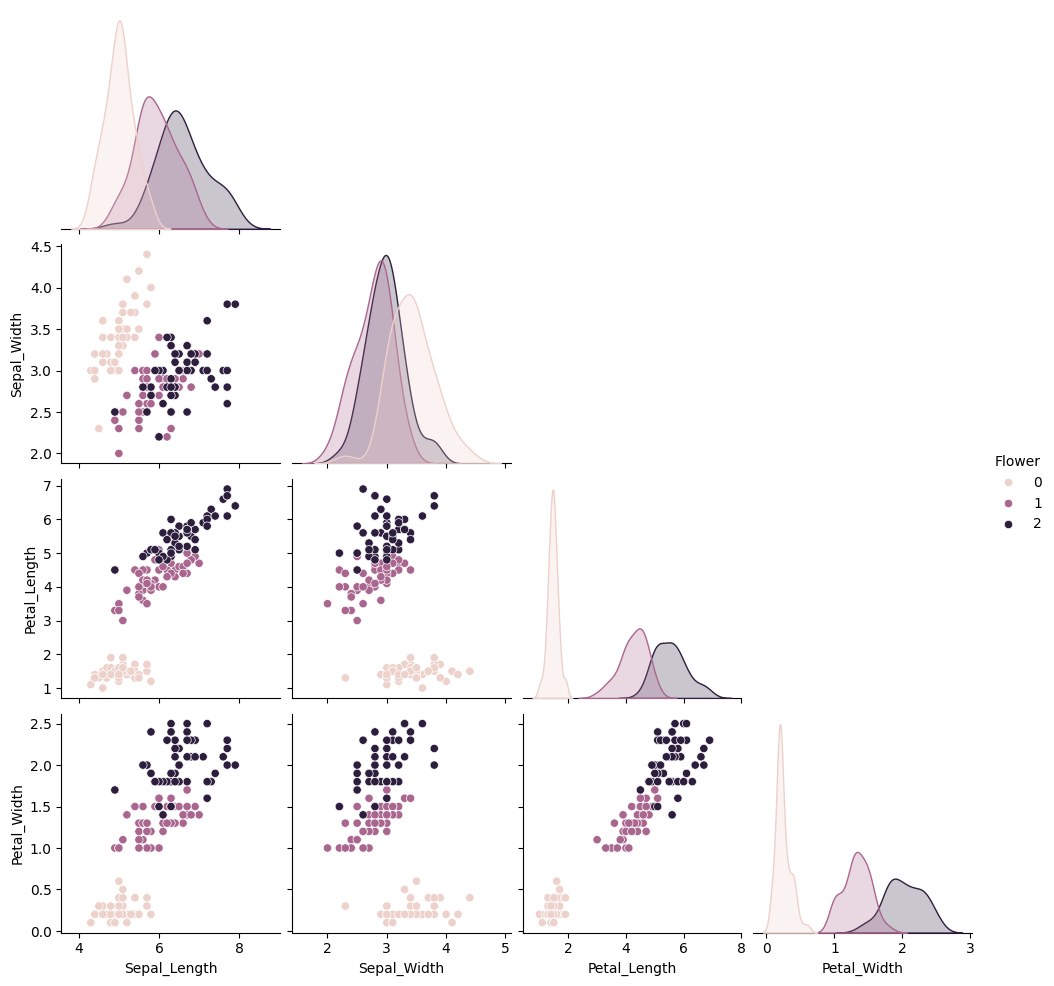

In [139]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [140]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

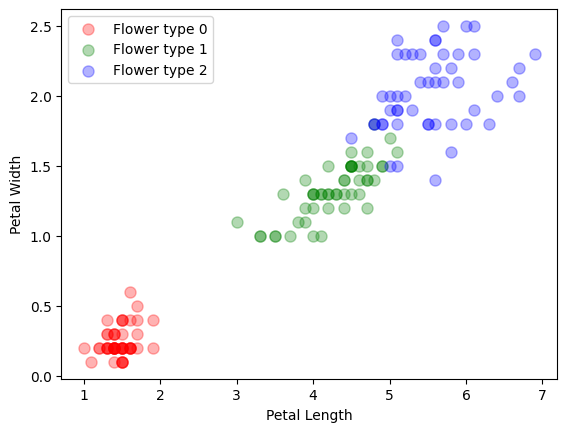

In [141]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

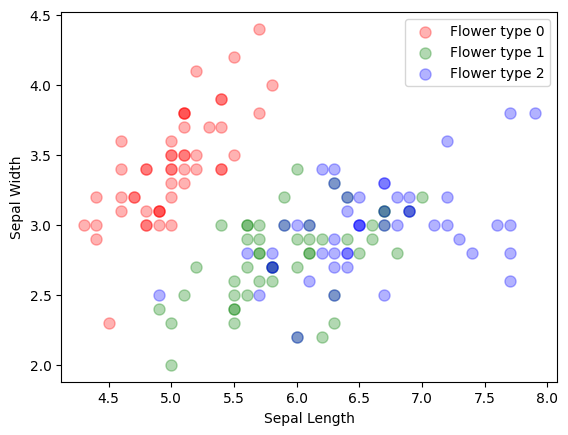

In [142]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [143]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
# X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values

In [144]:
# Understand the data X
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [145]:
# Understand the data y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [146]:
# Calculate the number of observations in the dataset
dataset.shape[0]

150

In [147]:
(dataset['Flower'] == 0).sum()

np.int64(50)

In [148]:
# Calculate the number of observations for class 1
(dataset['Flower'] == 1).sum()

np.int64(50)

In [149]:
# Calculate the number of observations for class 2
(dataset['Flower'] == 2).sum()

np.int64(50)

# Train a classifier

## Train the classification model

In [150]:
# Import sklearn linear_model
from sklearn.linear_model import LinearRegression

# Initialize the classifier
model: LinearRegression = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

LinearRegression()

## Predict the class of a new observation

In [151]:
# Get a new observation
# xnew = np.array([[5.5, 3.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew

array([[6.5, 3.5, 5.5, 2.5]])

In [152]:
# Make the prediction using xnew

# Get the predicted class
predicted_class = model.predict(xnew).round().astype(int)
predicted_class

array([2])

The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [153]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Number of observations in the train set
x_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [155]:
# Number of observations of each class in the train set
train_class_counts = pd.Series(y_train).value_counts()
train_class_counts

1    41
0    40
2    39
Name: count, dtype: int64

In [156]:
# Number of observations in the test set
x_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [157]:
# Number of observations of each class in the test set
test_class_counts = pd.Series(y_test).value_counts()
test_class_counts

2    11
0    10
1     9
Name: count, dtype: int64

## Train the classification model

In [158]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
forest = RandomForestClassifier(max_depth=5, random_state=42)

# Fit the model to the training data
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

## Test the classification model

In [159]:
# Make the predictions using the test set
y_pred = forest.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Compute the acurracy

In [160]:
# Calculate total accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 1.0


In [161]:
# Filtrar las predicciones y etiquetas verdaderas para la clase 0
y_test_class_0 = y_test[y_test == 0]
y_pred_class_0 = y_pred[y_test == 0]

# Calcular la precisión para la clase 0
accuracy_class_0 = accuracy_score(y_test_class_0, y_pred_class_0)
print(f"Accuracy for class 0: {accuracy_class_0}")

Accuracy for class 0: 1.0


In [162]:
# Compute accuracy for class 1
y_test_class_1 = y_test[y_test == 1]
y_pred_class_1 = y_pred[y_test == 1]

# Calcular la precisión para la clase 1
accuracy_class_1 = accuracy_score(y_test_class_1, y_pred_class_1)
print(f"Accuracy for class 1: {accuracy_class_1}")

Accuracy for class 1: 1.0


In [163]:
# Compute accuracy for class 2
y_test_class_2 = y_test[y_test == 2]
y_pred_class_2 = y_pred[y_test == 2]

# Calcular la precisión para la clase 2
accuracy_class_2 = accuracy_score(y_test_class_2, y_pred_class_2)
print(f"Accuracy for class 2: {accuracy_class_2}")

Accuracy for class 2: 1.0


## Confussion matrix

In [164]:
# Compute confussion matrix (normalized confusion matrix)
confusion_matrix = confusion_matrix(y_test, y_pred)

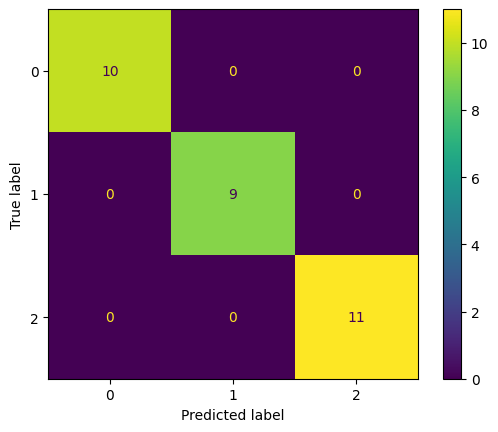

In [165]:
# Plot normalized confussion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix)
cm_display.plot()
plt.show()

# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?

    Todas las pruebas hechas daban el mismo resultado de 100% de precisión, por lo que se puede concluir que el clasificador seleccionado es capaz de predecir el resultado de forma consistente sin importar el conjunto de datos con el que se entrene el modelo


2) Using the four variables, try with two classifiers. Which provides the best performance?

    El mejor clasificador fue el de Random Forest con 100% de precisión